<Figure size 1440x720 with 0 Axes>

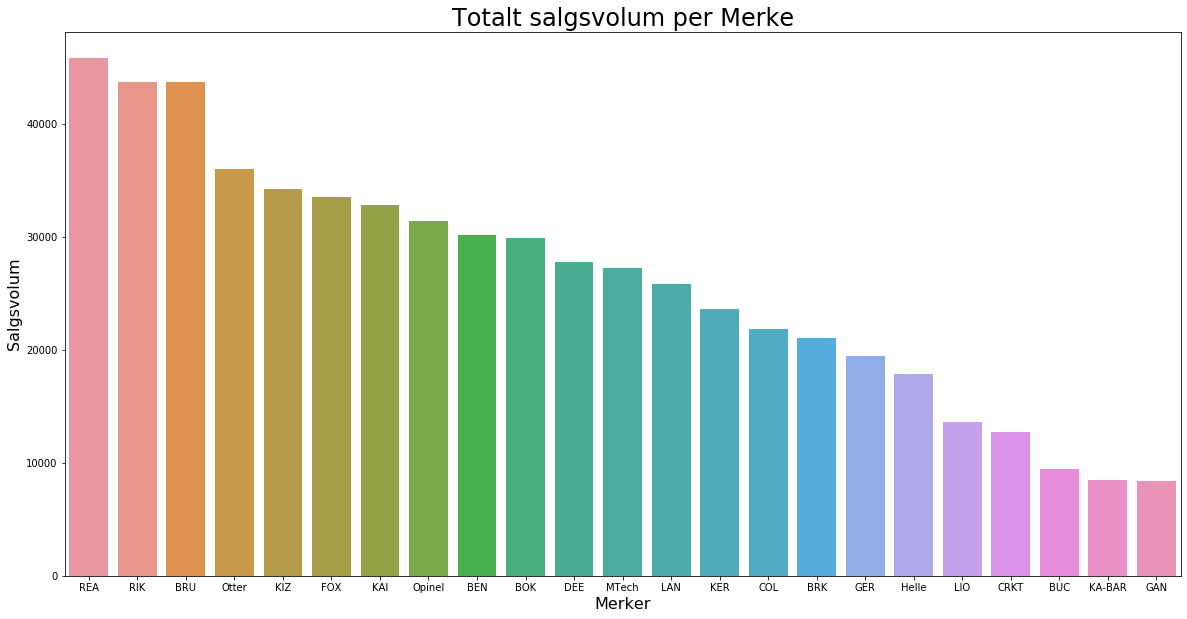

<Figure size 1440x720 with 0 Axes>

In [2]:
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merker = ["BRK", "BC", "BEN", "BOK", "BUC", "BRU", "COL", "CRKT", "FOX", "DEE", "GAN", "GER", "Helle", "KA-BAR", "KAI", "KER", "KIZ", "LAN", "LIO", "MTech", "Muela", "Opinel", "Otter", "REA", "RIK"]

# Trekk merker fra merkelisten X antall ganger med erstattning
merker_lang = []
for i in range(100):
    rand_merke = random.choice(merker)
    merker_lang.append(rand_merke)

# Generer salgspriser for varene assosiert med merkene
priser = []
for i in range(100):
    rand_price = random.randint(200, 12000)
    priser.append(rand_price)
    
# Lag en dataramme med 2 kolonner: Merker | Price - med de genererte salgsdataene                  
df = pd.DataFrame()
df['Merker'] = merker_lang
df['Price'] = priser


# Legg sammen alle salgsprisene innenfor hvert merke
total_pris = []
total_merke = []
for merke in merker:
    if merke in merker_lang:
        total_pris.append(df.groupby('Merker')['Price'].sum()[merke])
        if merke not in total_merke:
            total_merke.append(merke)
    
# Lag enda en dataramme, denne gangen med summerte tall og bare én instans av hvert merke (kategorier)
gf = pd.DataFrame()
gf['Merker'] = total_merke
gf['Total_salg'] = total_pris
gf = gf.sort_values(by='Total_salg', ascending=False)

# Barplot
plt.figure(figsize = (20,10))
z = sns.barplot(x = 'Merker', y="Total_salg", data = gf)
plt.xlabel('Merker', size=16)
plt.ylabel('Salgsvolum', size=16)
plt.title('Totalt salgsvolum per Merke', size=24)
plt.figure(figsize = (20,10))